Part A:

1. The probability of a specific value not being missing is 1−0.15=0.85 
For a record to have no missing values across all 40 variables, the probability is 0.85^40
The probability of a record having at least one missing value is 1−0.85^40
About 500000*(1-0.85^40)=499249 records should be removed

2. 0.053672650871225025
positively correlated

In [9]:
import pandas as pd
from scipy.stats import zscore
 
# Manually transcribed data from the provided table image
data = {
    "Age": [24, 55, 35, 26, 23, 52, 25, 24, 63, 31, 33, 45, 59, 44, 29, 21, 21, 51, 42, 21],
    "BMI": [30.2, 25.1, 35.8, 47.9, 26.4, 35.6, 34.3, 25.9, 32.4, 43.3, 43.1, 30.9, 30.1, 27.6, 41.3, 23.2, 25.4, 36.6, 29.3, 22.1]
}
 
# Create a DataFrame
df = pd.DataFrame(data)
 
# Perform z-score normalization
df['Age_zscore'] = zscore(df['Age'])
df['BMI_zscore'] = zscore(df['BMI'])
 
# Calculate the Pearson correlation coefficient
correlation_coefficient = df['Age_zscore'].corr(df['BMI_zscore'])
 
# Print the normalized data and the correlation coefficient
print(df[['Age_zscore', 'BMI_zscore']])
print(f'Pearson correlation coefficient: {correlation_coefficient}')

    Age_zscore  BMI_zscore
0    -0.894884   -0.298734
1     1.379002   -1.015695
2    -0.088021    0.488517
3    -0.748182    2.189542
4    -0.968235   -0.832940
5     1.158948    0.460401
6    -0.821533    0.277647
7    -0.894884   -0.903230
8     1.965811    0.010544
9    -0.381426    1.542872
10   -0.234724    1.514756
11    0.645490   -0.200327
12    1.672407   -0.312792
13    0.572139   -0.664243
14   -0.528128    1.261711
15   -1.114938   -1.282798
16   -1.114938   -0.973520
17    1.085597    0.600982
18    0.425437   -0.425256
19   -1.114938   -1.437436
Pearson correlation coefficient: 0.053672650871225025


Part B:

EDA - Univariate & Multivariate Analysis:

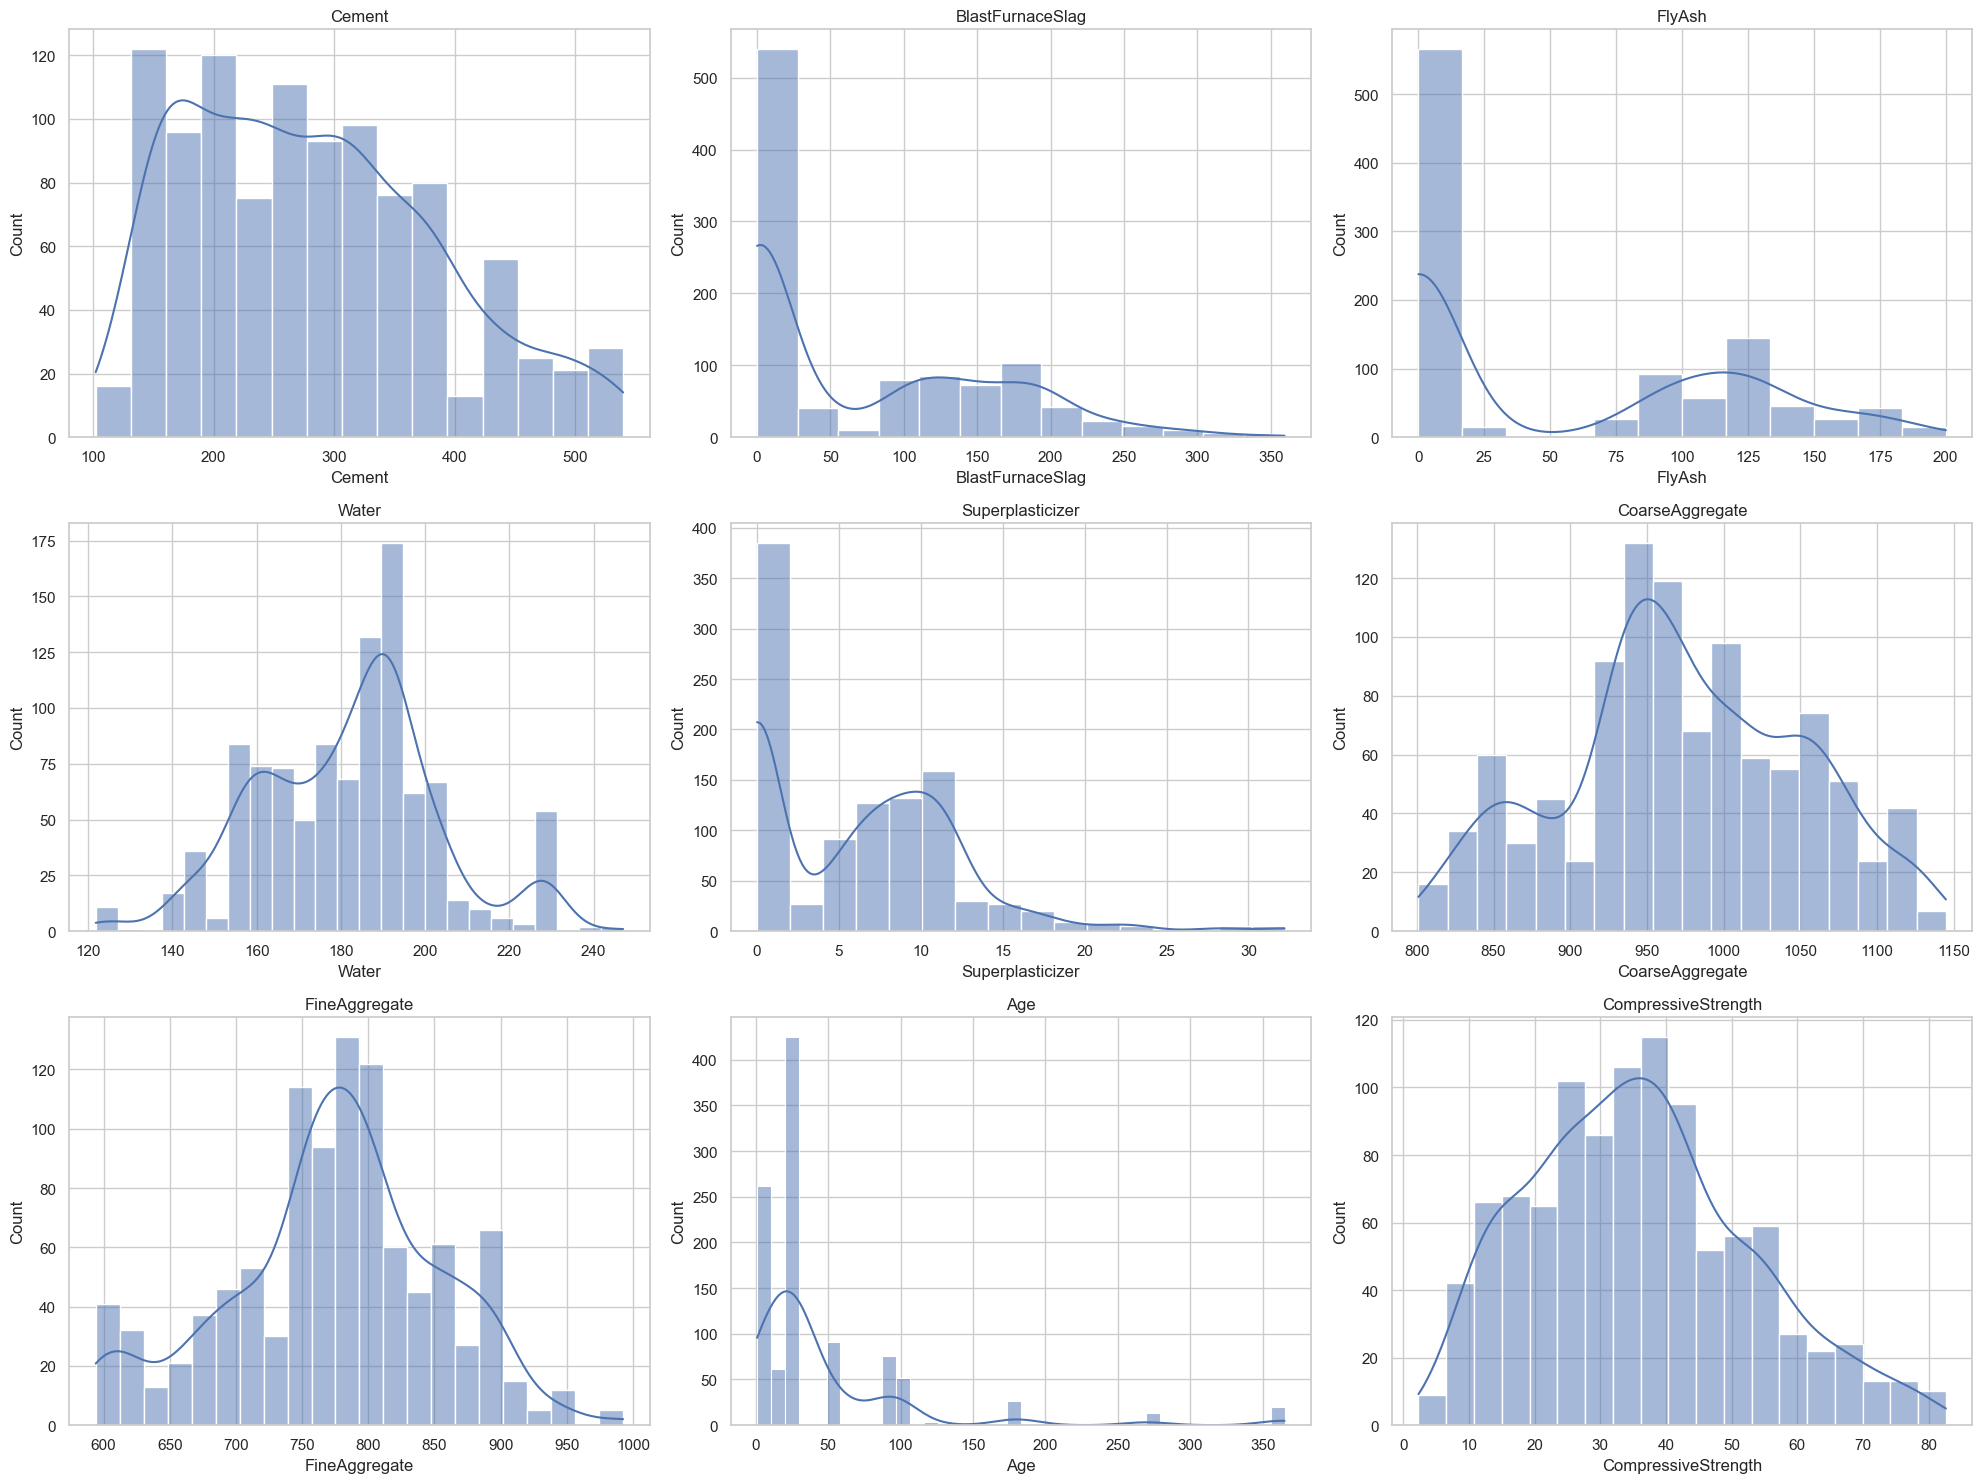

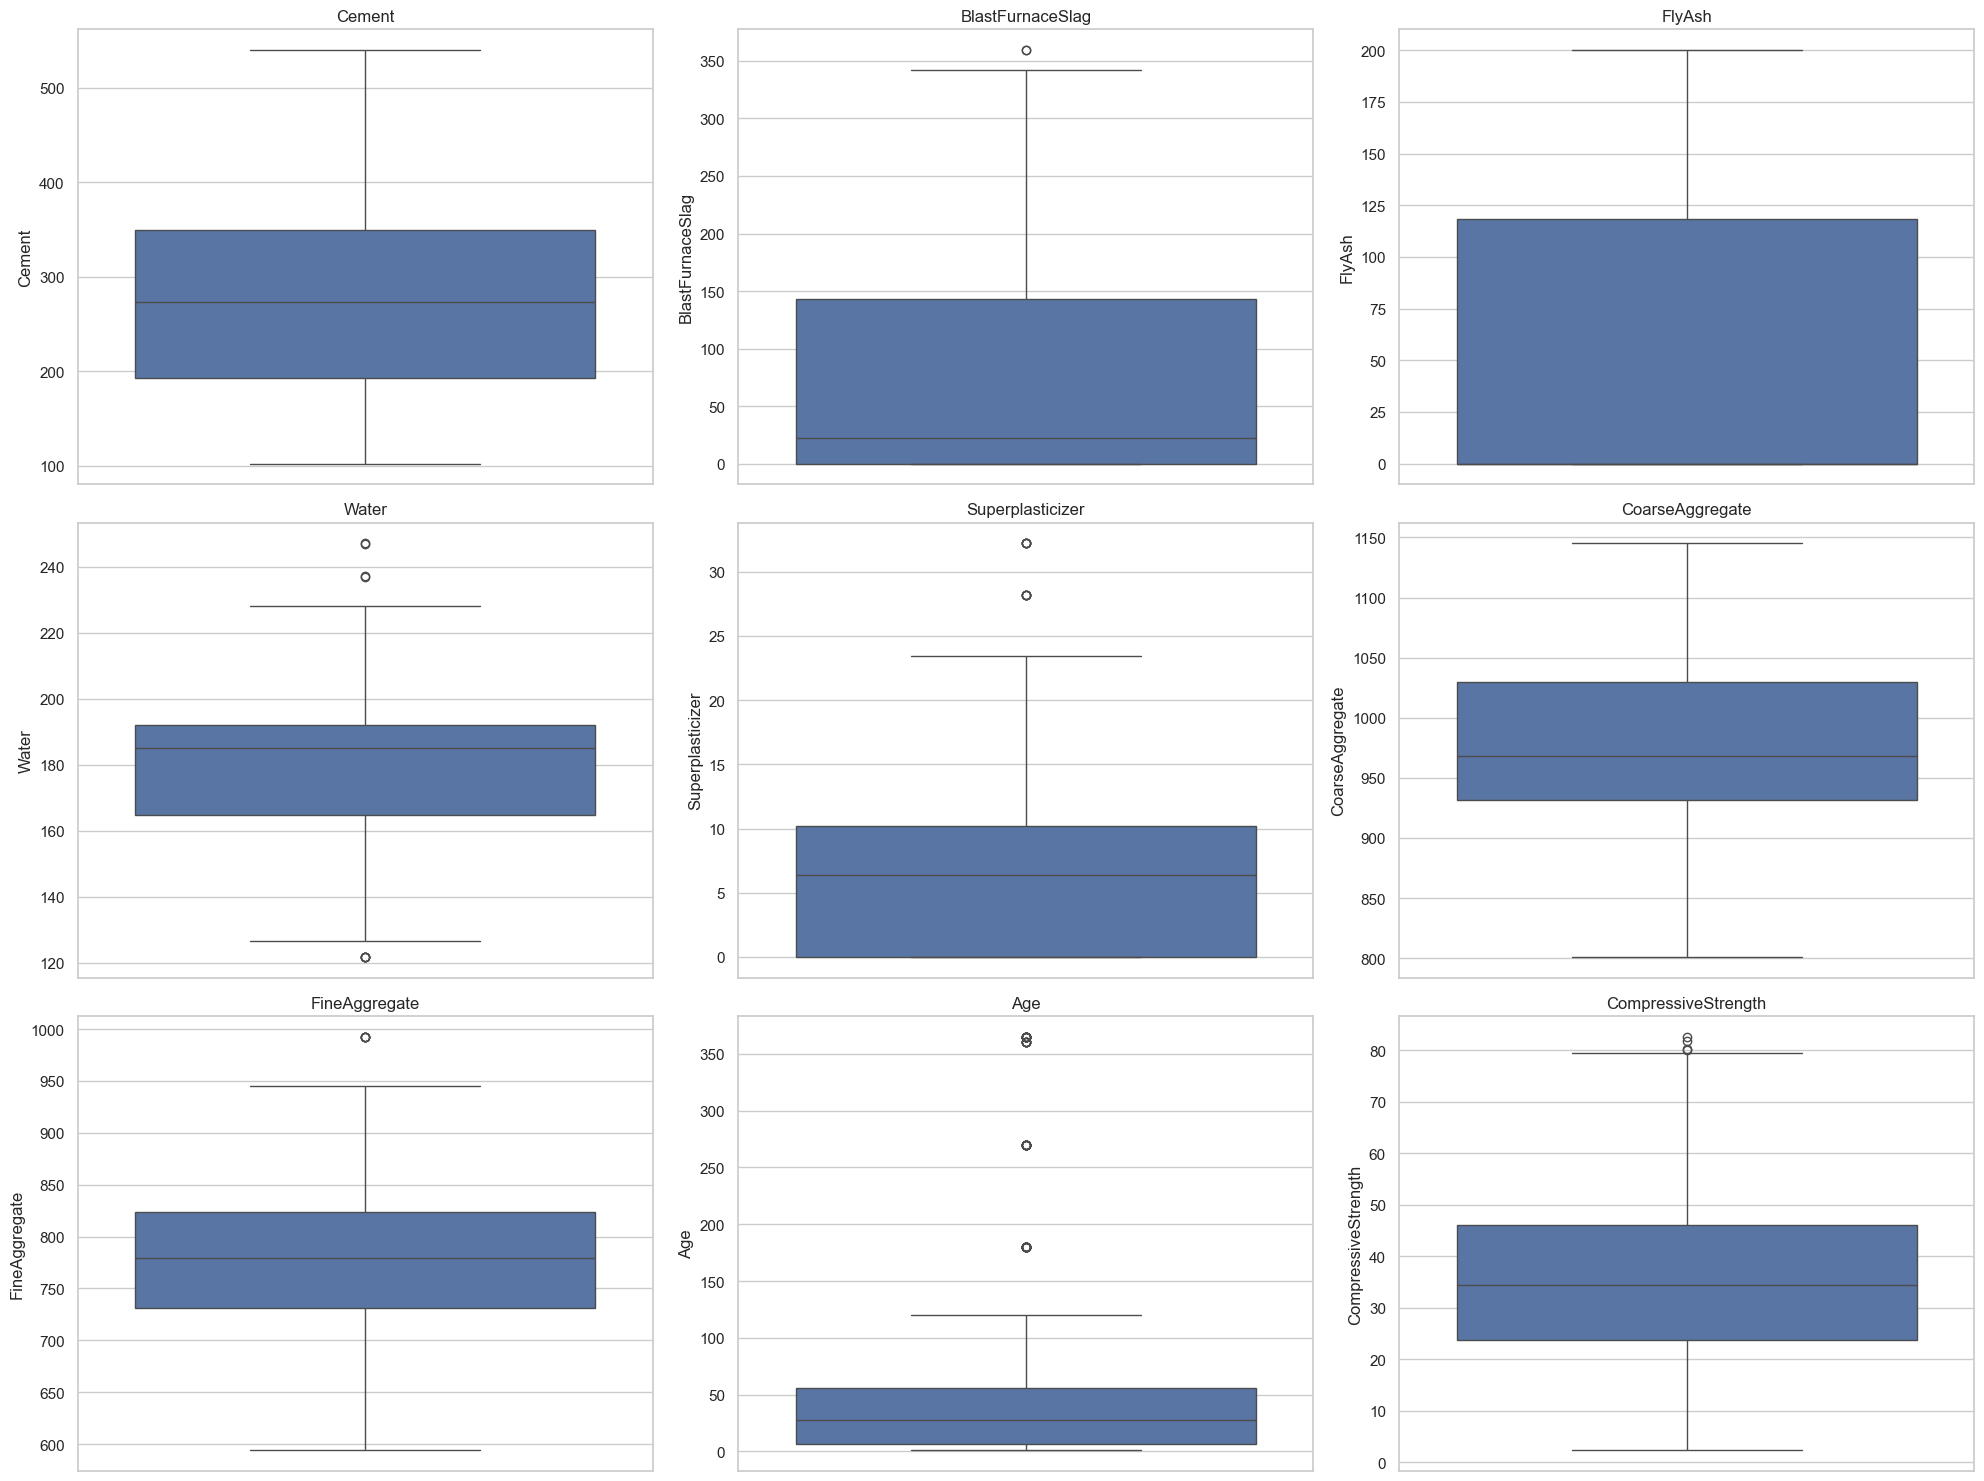

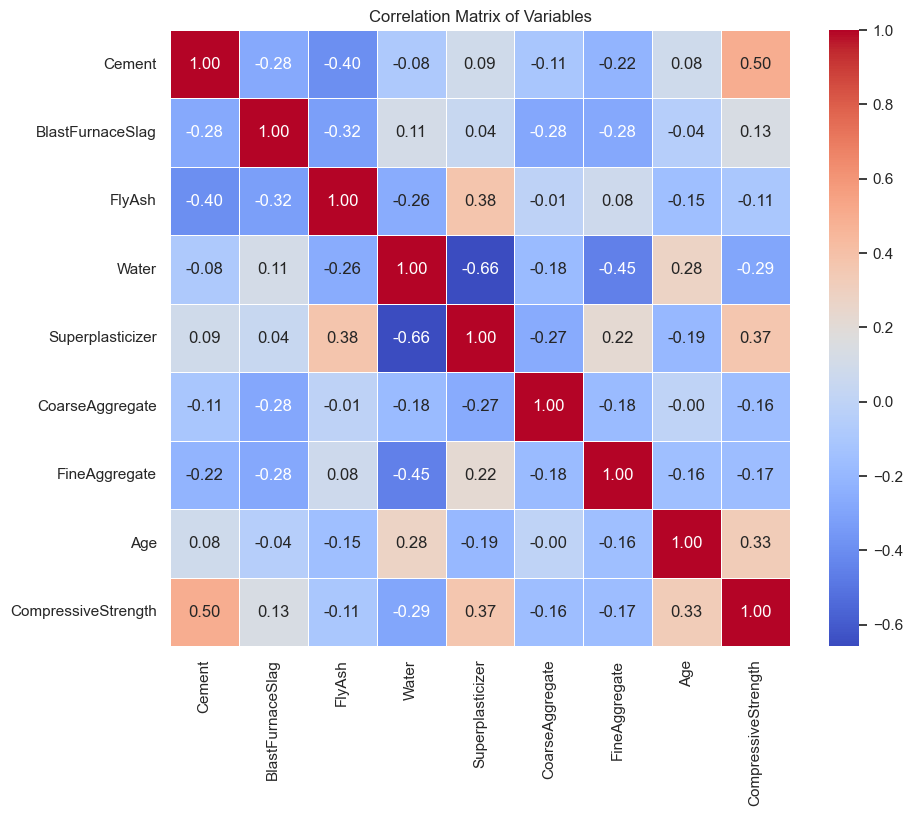

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
 
# Load the dataset
file_path = 'concrete.csv'  # Make sure to update this path
concrete_data = pd.read_csv(file_path)
 
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
 
# Univariate Analysis: Histograms for all variables
plt.figure(figsize=(20, 15))
for i, column in enumerate(concrete_data.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(concrete_data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()
 
# Multivariate Analysis: Boxplots for all variables
plt.figure(figsize=(20, 15))
for i, column in enumerate(concrete_data.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=concrete_data[column])
    plt.title(column)
plt.tight_layout()
plt.show()
 
# Heatmap to assess correlation between predictor variables and the target variable
corr_matrix = concrete_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()


Data preparation & Feature Engineering: 


Mean Squared Error: 125.24564805050203
R^2 Score: 0.5801703029028773


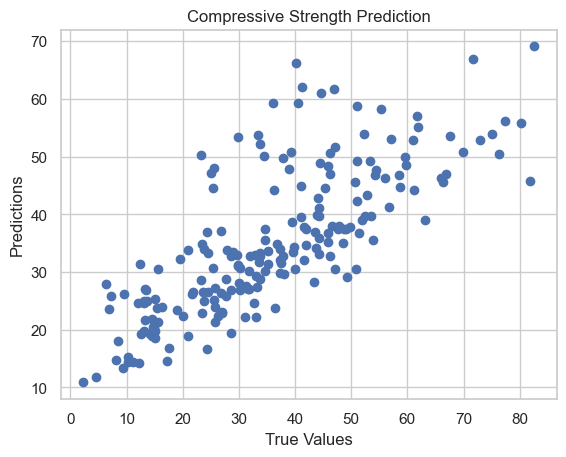

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
 
# Load the dataset
file_path = 'concrete.csv'
concrete_data = pd.read_csv(file_path)
 
# Data Quality Checks
# Remove duplicate rows if any
concrete_data = concrete_data.drop_duplicates()
 
# Check for missing values
# Assuming no missing values based on previous inspection, but here's how you could handle it
# concrete_data.fillna(concrete_data.mean(), inplace=True)
 
# Identify potential outliers using IQR for each column
Q1 = concrete_data.quantile(0.25)
Q3 = concrete_data.quantile(0.75)
IQR = Q3 - Q1
 
# Note: Adjusting this step based on domain knowledge and specific dataset characteristics is crucial
# This code does not remove outliers but shows how you could identify them
outliers = ((concrete_data < (Q1 - 1.5 * IQR)) | (concrete_data > (Q3 + 1.5 * IQR))).any(axis=1)
 
# Rescale Data with StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(concrete_data.drop('CompressiveStrength', axis=1))
 
# Handle Zero Values
# In this context, zeros in certain columns like 'BlastFurnaceSlag' or 'FlyAsh' are valid
# and represent the absence of those materials in the mix.
 
# Check for Multicollinearity
# Calculating correlation matrix
corr_matrix = concrete_data.corr()
 
# Feature Engineering
# As an example, create a feature that represents the total mix quantity
concrete_data['TotalMix'] = concrete_data.drop(['Age', 'CompressiveStrength'], axis=1).sum(axis=1)
scaled_features = np.hstack((scaled_features, concrete_data[['TotalMix']].values))
 
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, concrete_data['CompressiveStrength'], test_size=0.2, random_state=42)
 
# Model Training (Example with Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)
 
# Predictions
predictions = model.predict(X_test)
 
# Evaluation
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
 
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
 
# Plotting some results (optional)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Compressive Strength Prediction')
plt.show()

Modeling & Evaluation:

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import numpy as np
 
# Load the dataset
file_path = 'concrete.csv'
concrete_data = pd.read_csv(file_path)
 
# Prepare the data
X = concrete_data.drop('CompressiveStrength', axis=1)
y = concrete_data['CompressiveStrength']
 
# Split the dataset into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
# Initialize the models
knn_regressor = KNeighborsRegressor()
rf_regressor = RandomForestRegressor(random_state=42)
xgboost_regressor = xgb.XGBRegressor(random_state=42)
 
# Fit the models
knn_regressor.fit(X_train_scaled, y_train)
rf_regressor.fit(X_train_scaled, y_train)
xgboost_regressor.fit(X_train_scaled, y_train)
 
# Predictions
knn_pred = knn_regressor.predict(X_test_scaled)
rf_pred = rf_regressor.predict(X_test_scaled)
xgb_pred = xgboost_regressor.predict(X_test_scaled)
 
# Utilize a voting regressor
voting_regressor = VotingRegressor(estimators=[('knn', knn_regressor), ('rf', rf_regressor), ('xgb', xgboost_regressor)])
voting_regressor.fit(X_train_scaled, y_train)
voting_pred = voting_regressor.predict(X_test_scaled)
 
# Evaluation function
def evaluate_model(predictions, actual=y_test):
    mse = mean_squared_error(actual, predictions)
    mae = mean_absolute_error(actual, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predictions)
    return mse, mae, rmse, r2
 
# Evaluate individual models
knn_metrics = evaluate_model(knn_pred)
rf_metrics = evaluate_model(rf_pred)
xgb_metrics = evaluate_model(xgb_pred)
 
# Evaluate voting regressor
voting_metrics = evaluate_model(voting_pred)
 
# Print the evaluation results
print("KNN Metrics (MSE, MAE, RMSE, R2):", knn_metrics)
print("Random Forest Metrics (MSE, MAE, RMSE, R2):", rf_metrics)
print("XGBoost Metrics (MSE, MAE, RMSE, R2):", xgb_metrics)
print("Voting Regressor Metrics (MSE, MAE, RMSE, R2):", voting_metrics)
 
# Comparing results to identify the best and worst-performing models will involve examining the output of the above print statements.

KNN Metrics (MSE, MAE, RMSE, R2): (89.29619795469254, 7.3532297734627825, 9.449666552566422, 0.6699752745513452)
Random Forest Metrics (MSE, MAE, RMSE, R2): (30.011418531776428, 3.7608048443519806, 5.478267840456181, 0.8890825098029418)
XGBoost Metrics (MSE, MAE, RMSE, R2): (24.231438937703583, 3.173877035468142, 4.922543949799086, 0.9104444067517969)
Voting Regressor Metrics (MSE, MAE, RMSE, R2): (32.274266568741204, 4.0754636540655245, 5.681044496282458, 0.8807193787935986)


Part C:

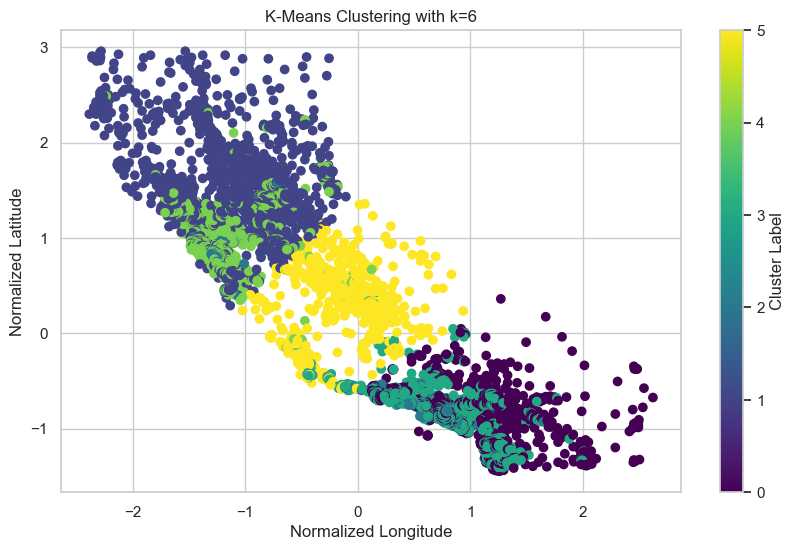

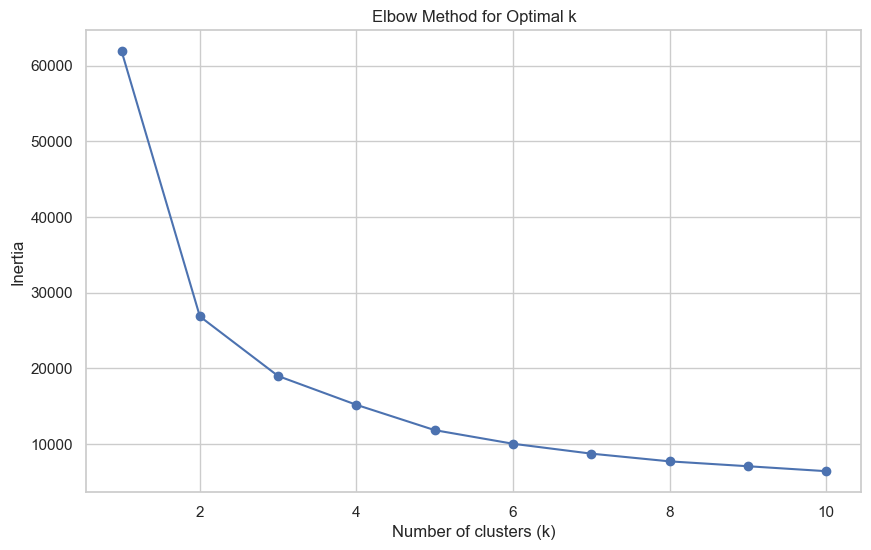

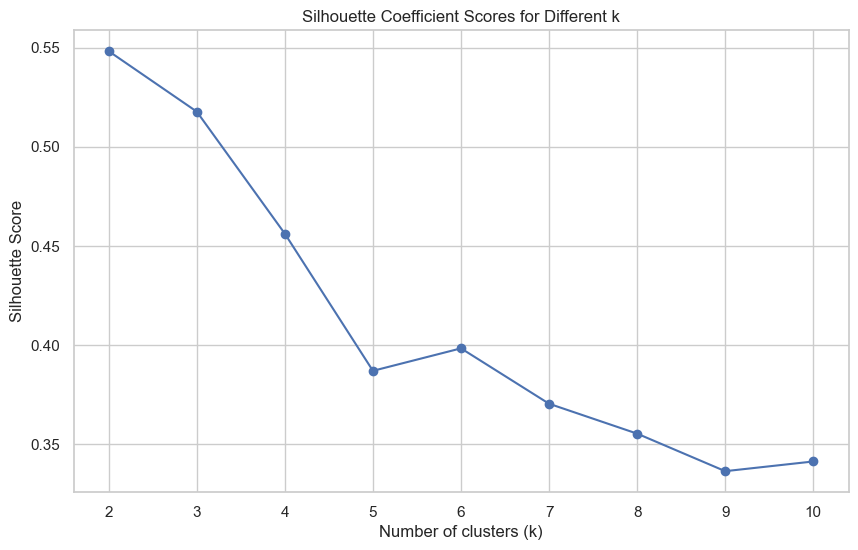

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load the dataset from the specified CSV file
data = pd.read_csv('housing.csv')

# Select key attributes for clustering
# We focus on 'median_income', 'longitude', and 'latitude' as they are crucial for identifying economic segments across regions
key_attributes = data[['MedInc', 'Longitude', 'Latitude']]

# Normalize the data to ensure each feature contributes equally to the distance computations in K-Means
scaler = StandardScaler()
key_attributes_normalized = scaler.fit_transform(key_attributes)

# Perform K-Means clustering with k=6
# k=6 is chosen based on the initial requirement, aiming to identify six distinct economic segments
random_states=30
#kmeans = KMeans(n_clusters=6)
kmeans = KMeans(n_clusters=6, random_state=random_states)
kmeans.fit(key_attributes_normalized)

# Plot the clusters to visualize how data points are grouped
# This visualization uses normalized longitude and latitude for plotting
plt.figure(figsize=(10, 6))
plt.scatter(key_attributes_normalized[:, 1], key_attributes_normalized[:, 2], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering with k=6')
plt.xlabel('Normalized Longitude')
plt.ylabel('Normalized Latitude')
plt.colorbar(label='Cluster Label')
plt.show()

# Apply the elbow method to find the optimal number of clusters (k)
# The elbow method plots the inertia (within-cluster sum of squares) against different k values
inertia = []
for k in range(1, 11):
    #kmeans = KMeans(n_clusters=k)
    kmeans = KMeans(n_clusters=k, random_state=random_states)
    kmeans.fit(key_attributes_normalized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Evaluate the quality of clusters using the Silhouette Coefficient method
# The Silhouette Coefficient measures how similar an object is to its own cluster compared to other clusters
# The value ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters
silhouette_scores = []
for k in range(2, 11): # Silhouette score cannot be computed for k=1 as it requires more than one cluster
    kmeans = KMeans(n_clusters=k, random_state=random_states)
    kmeans.fit(key_attributes_normalized)
    score = silhouette_score(key_attributes_normalized, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Coefficient Scores for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()
